<a href="https://colab.research.google.com/github/Sharon-Mukami/Ensemble_methods/blob/main/Ensemble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENSEMBLE METHODS
In Data Science, the term ensemble refers to an algorithm that makes use of more than one model to make a prediction.

Ensemble methods are broadly classified into two categories: *Bagging* and *Boosting*, and also include Stacking.

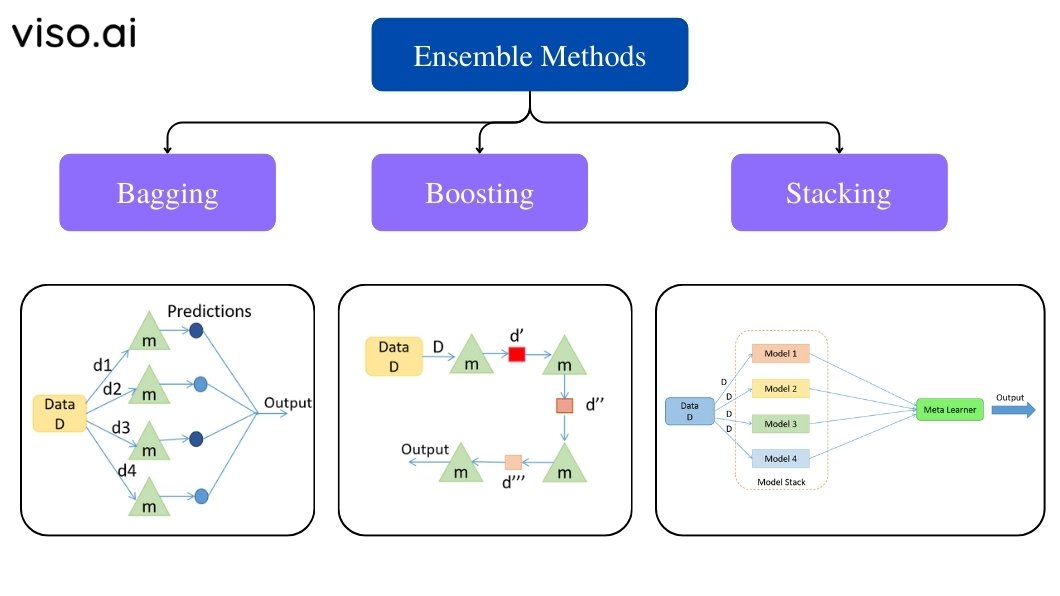

###1. Bagging (Bootstrap Aggregating)

Bagging involves training multiple models in parallel on different subsets of the dataset and then averaging their predictions (for regression) or taking a majority vote (for classification).

Key concept: Reduce variance by averaging models.

Steps:

- Randomly sample the training data with replacement to create multiple subsets (bootstrap samples).
- Train a base model on each subset.
- Aggregate the predictions from all models (averaging for regression, majority voting for classification).

Popular Algorithm: *Random Forest*

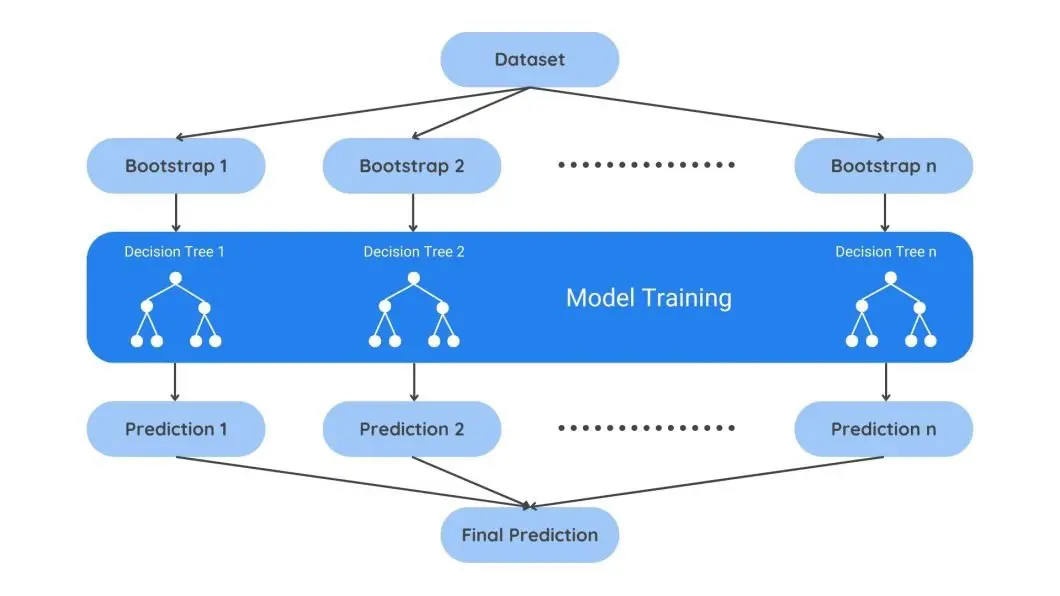

In [ ]:
#Code Example (Bagging using Random Forest)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=80)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train model
rf_model.fit(X_train, y_train)
# Predict
y_pred = rf_model.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')


Random Forest Accuracy: 0.9111111111111111


###2. Boosting
Boosting is a sequential process where each model corrects the errors of the previous one. It reduces bias and builds a strong learner by training models in sequence.

Key concept: Reduce bias by focusing on the mistakes of prior models.

Steps:

- Train a base model on the dataset.
- Focus on the instances that were incorrectly predicted by the model.
- Build the next model to correct the errors.
- Aggregate predictions (weighted sum).

Popular Algorithms: AdaBoost, Gradient Boosting, XGBoost, LightGBM

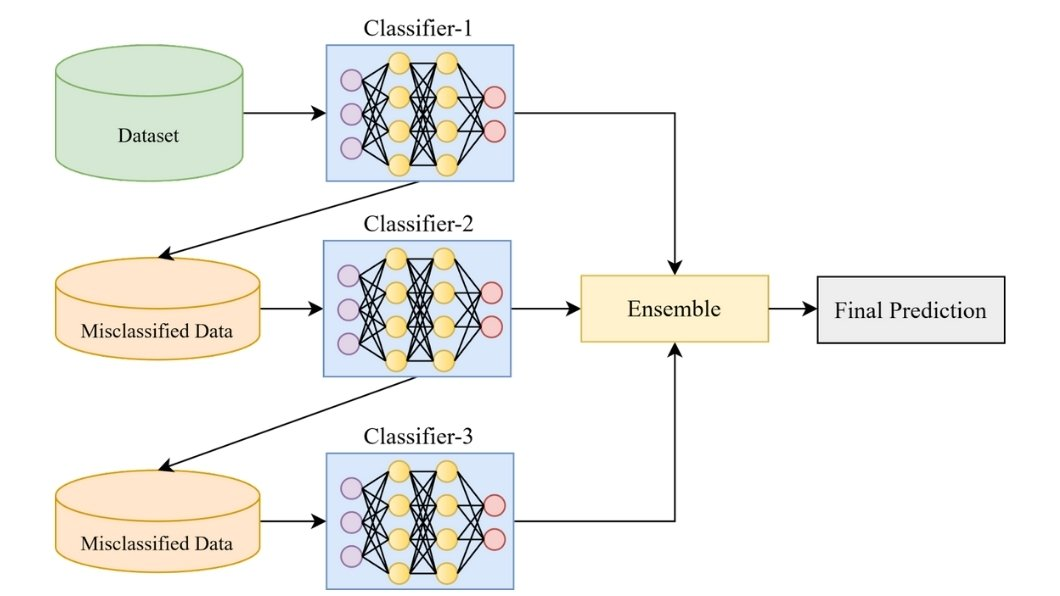

In [ ]:
#Code Example (Boosting using Gradient Boosting):

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=80)

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# Train model
gb_model.fit(X_train, y_train)
# Predict
y_pred = gb_model.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy}')


Gradient Boosting Accuracy: 0.9333333333333333


###3. Stacking (Stacked Generalization)

*Stacking* involves training different models (base models) and using another model (meta-learner) to learn how to best combine the predictions of the base models.

Key concept: Use a meta-model to learn how to combine predictions from base models.

Steps:
- Train multiple base models.
- Use the predictions of the base models as features for a meta-model.
- Train the meta-model to output the final prediction.

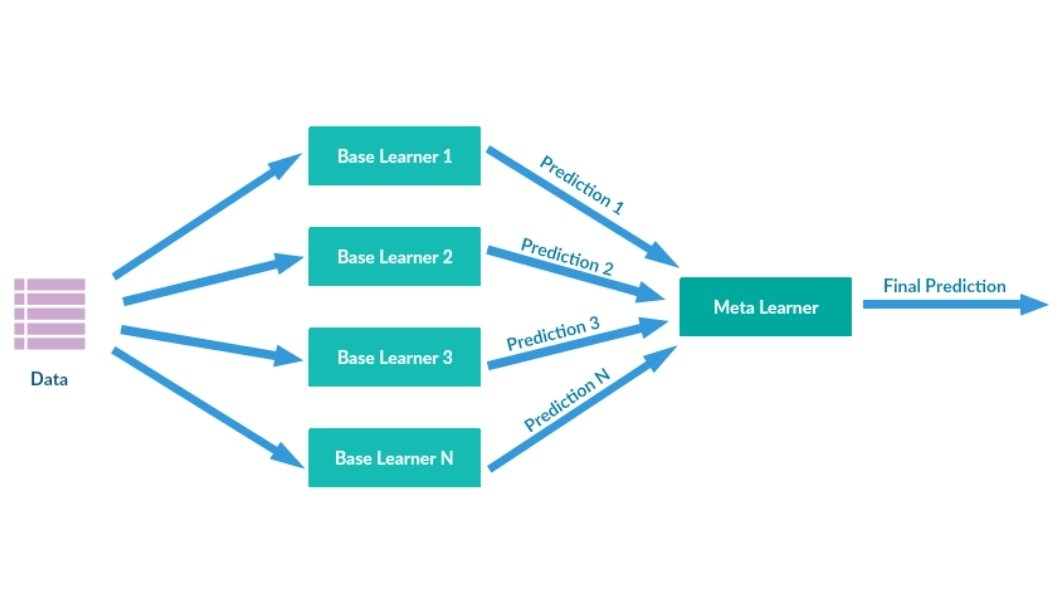

###Summary of Ensemble Methods:
- **Bagging:**

Focuses on reducing variance.
E.g: Random Forest.

- **Boosting:**

Focuses on reducing bias.
E.g: AdaBoost, Gradient Boosting, XGBoost.

- **Stacking:**

Combines predictions from multiple models using a meta-learner.
E.g: Stacking with Logistic Regression or other models.

## Random Forest

Random Forest is an ensemble learning method used for both classification and regression tasks. It operates by building multiple decision trees during training and outputs the mode of the classes (for classification) or mean prediction (for regression) of the individual trees.

 ***How Random Forest Works***

- **Step 1:** A random subset of the training data is selected with replacement (bootstrap sampling).
- **Step 2:** For each subset, a decision tree is constructed. Unlike a typical decision tree, random forest limits the number of features considered for splitting at each node to a random subset of features.
- **Step 3:** The process is repeated multiple times to create a "forest" of trees.
- **Step 4:** Predictions from all trees are combined (averaging for regression, majority voting for classification).

**Key Concepts**

- **Bootstrap Sampling:** Each tree is trained on a random subset of the original data, creating diverse models.

- **Random Feature Selection:** Each tree selects a random subset of features for splitting, which increases model diversity and reduces correlation between trees.

- **Ensemble Voting:** For classification, the forest votes based on majority, and for regression, it averages predictions from each tree.

**Advantages of Random Forest**

- *Reduces Overfitting:* By averaging the predictions of many trees, Random Forest prevents overfitting, which is common in decision trees.

- *Handles Large Datasets:* Works well even with large datasets and many features.

- *Handles Missing Data:* Random Forest can handle missing values relatively well.

- *Variable Importance:* It provides feature importance, allowing us to understand which features contribute the most to prediction.

**Disadvantages**
- *Computational Complexity:* Since it involves building multiple trees, it requires more computational resources than a single decision tree.
- *Memory Usage*

**Hyperparameters of Random Forest**

- *n_estimators:* The number of trees in the forest. Higher numbers generally improve performance but increase computation time.
- *max_depth:* The maximum depth of each tree. Restricting the depth prevents overfitting.
- *max_features:* The number of features to consider for the best split. Can be set to 'sqrt', 'log2', or a specific number.
- *min_samples_split:* The minimum number of samples required to split an internal node.
- *min_samples_leaf:* The minimum number of samples required to be at a leaf node.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Initialize Random Forest Classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 95.56%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



**Feature Importance**

Random Forest models provide feature importance, helping identify which features are most influential in making predictions.

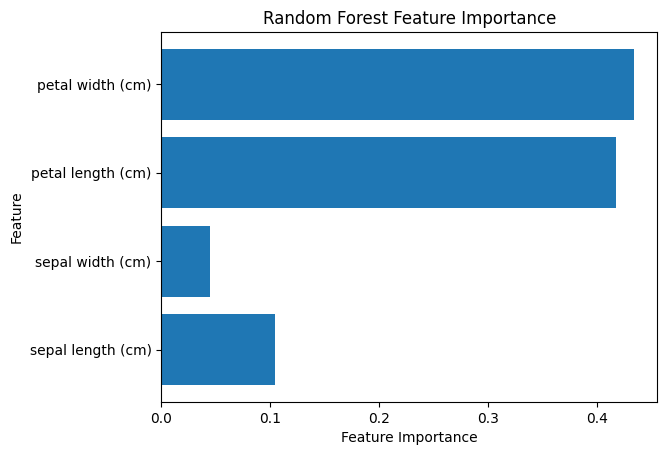

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = rf_classifier.feature_importances_

# Plot feature importance
plt.barh(iris.feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


**Tips for Using Random Forest**

- *Choosing n_estimators:* Increasing the number of trees will generally improve the performance, but after a certain point, it may not significantly boost accuracy and will just slow down the training.
- *Feature Selection:* Use feature importance to reduce the number of irrelevant features.
- *Handling Imbalanced Datasets:* Use the class_weight='balanced' parameter for imbalanced classification tasks.